In [1]:
# Sao Paulo, 9 de Novembro de 2021
# A tabela 'government_organization' recebeu uma coluna adicional identificando o orgao como civil ou militar

# Sao Paulo, 03 de Novembro de 2021
# Em resumo, o que importa e' a tabela patent_govintorg, que relaciona um patent_id a uma agencia governamental
# Esta implicito uma dummy (se a patente tem interesse governamental) convertendo organization_id 
# Talvez valha a pena classificar as agencias em militar/civil

# September 23rd, 2021
# Sao tres tabelas, patent_contractawardnumber, patent_govintorg e government_organization.
# De maior interesse e' o cruzamento entre as duas ultimas, para ver quais agencias contrataram quais patentes

# February 14st, 2020
# Government patents

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#numero dos contratos
#contract='data/patent_contractawardnumber.tsv.zip'

#cross reference patent vs organization
pat_gov='data/patent_govintorg.tsv.zip'

#dados das entidades governamentais (com coluna civil/militar)
gov_org='data/government_organization.tsv'

patent='data/cleanpatent.parquet.gz'

#df_contract=pd.read_csv(contract, compression='zip', sep='\t')
df_pat_govt=pd.read_csv(pat_gov, compression='zip',  sep='\t', index_col='patent_id')
df_gov_org=pd.read_csv(gov_org,  sep='\t')
df_pat = pd.read_parquet(patent)

## Agency Level

In [4]:
#df liga a patente ao nome da entidade governamental
#df_pat_govt = df_pat_govt.rename(columns={'organization_id': 'gov_organization_id'})
df=df_pat_govt.reset_index().merge(df_gov_org, left_on='organization_id', right_on='organization_id', how='inner')

In [5]:
df.head()

,patent_id,organization_id,name,level_one,level_two,level_three,category
0,10000026,10,Department of Energy,Department of Energy,NaN,NaN,civil
1,10000377,10,Department of Energy,Department of Energy,NaN,NaN,civil
2,10000390,10,Department of Energy,Department of Energy,NaN,NaN,civil
3,10000698,10,Department of Energy,Department of Energy,NaN,NaN,civil
4,10000787,10,Department of Energy,Department of Energy,NaN,NaN,civil


In [6]:
#dst='data/df_pat_govt.parquet.gz'
#df_pat_govt.to_parquet(dst, compression='gzip')

In [7]:
# as patentes podem ser agrupadas em tres diferentes niveis
df.groupby('name').size().sort_values(ascending=False).head() 

name
National Institutes of Health    34437
United States Government         26850
Department of Energy             24960
National Science Foundation      13890
Air Force                         8144
dtype: int64

In [8]:
#militares vs civis
df.groupby('category').size().sort_values(ascending=False).head() 

category
civil    134019
mil       39118
dtype: int64

## Patent Level

In [9]:
# aqui associamos a patente a sua data de grant, o num de claims e o id do orgao governamental
df2=df_pat.merge(df, left_index=True, right_on='patent_id', how='inner')

In [10]:
df2.head()

,date,num_claims,patent_id,organization_id,name,level_one,level_two,level_three,category
0,2018,18,10000026,10,Department of Energy,Department of Energy,NaN,NaN,civil
24960,2018,20,10000036,35,National Aeronautics and Space Administration,National Aeronautics and Space Administration,NaN,NaN,civil
1,2018,20,10000377,10,Department of Energy,Department of Energy,NaN,NaN,civil
30856,2018,20,10000377,47,Sandia National Laboratories,Department of Energy,Sandia National Laboratories,NaN,civil
32447,2018,12,10000384,31,National Science Foundation,National Science Foundation,NaN,NaN,civil


In [11]:
%matplotlib inline
sns.set()
%config InlineBackend.figure_format = 'retina'

In [16]:
df2.groupby(['date','category']).size()

date  category
1976  civil       1217
      mil          309
1977  civil       1190
      mil          239
1978  civil       1126
                  ... 
2017  mil         2386
2018  civil       7537
      mil         2352
2019  civil       6935
      mil         2671
Length: 88, dtype: int64

Text(0, 0.5, 'Total Patent Granted')

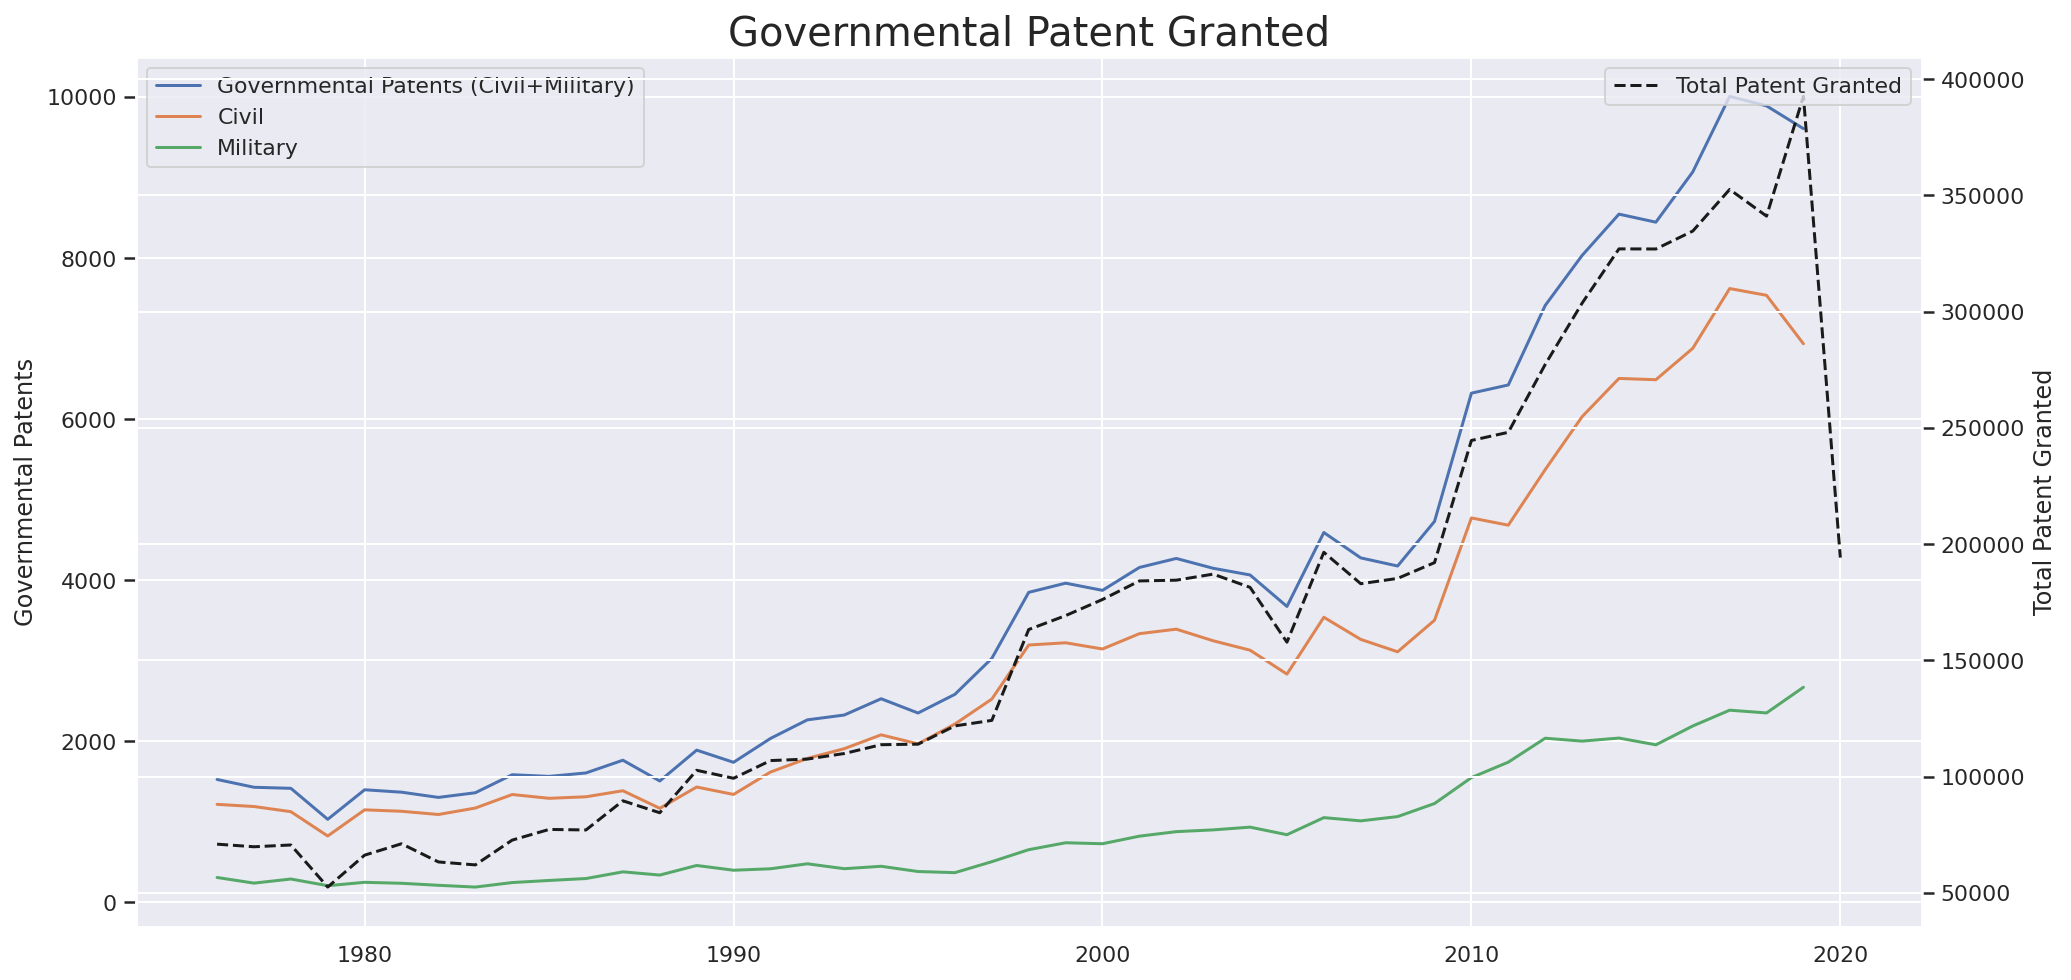

In [43]:
title="Governmental Patent Granted"
ax=df2.groupby('date').size().plot(figsize=(16,8))
df2.groupby(['date','category']).size().reset_index().pivot(index='date', columns='category', values=0 ).plot(ax=ax)
ax.set_title(title, fontsize=20)
ax.legend(['Governmental Patents (Civil+Military)', 'Civil', 'Military'], loc=0)
ax.set_xlabel("")
ax.set_ylabel('Governmental Patents')

legend="Total Patent Granted"
ax2=ax.twinx()
df_pat.groupby('date').size().plot(ax=ax2, style='k--')
ax2.legend([legend], loc=1)
ax2.set_ylabel('Total Patent Granted')